<a href="https://colab.research.google.com/github/ManuelGDS/Simulacion-1/blob/main/Aproximaci%C3%B3n_de_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **González de Santiago José Manuel**#

# **Aproximación de $\pi$: Por simulación**#

In [ ]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

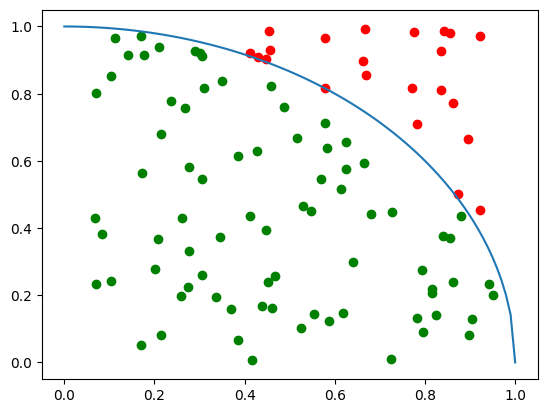

In [ ]:
#Muestra del experimento

x = np.linspace(0,1,100)
plt.plot(x,np.sqrt(1-x**2))
for i in range(100):
  u1=rnd.random()
  u2 = rnd.random()
  if u2 <=np.sqrt(1-u1**2):
    plt.scatter(u1,u2,color="green")
  else:
    plt.scatter(u1,u2,color="red")
plt.show()

In [ ]:

#Esta función la utilice para el histograma
def estimacion(n):
  contador = 0
  lista = []
  for i in range(1,n):
    u_1 =  rnd.random()
    u_2 =  rnd.random()
    operacion = np.sqrt(1-u_1**2)
    if u_2 <= operacion :
      contador += 1
    x = (4*(contador/i))
    lista.append(x)
  return lista[-1]

In [ ]:
def simulacion(M):
  r = []
  for i in range(M):
    R =estimacion(500)
    r.append(R)
  return r

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  0.,  0.,  0.,
        34.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.

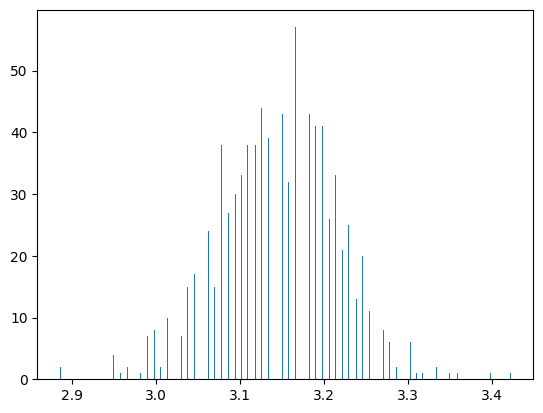

In [ ]:
S = simulacion(1000)
plt.hist(S, bins=500)

In [ ]:
def num_pi():
  contador = 0
  u1 = rnd.random()
  u2 = rnd.random()
  if u2 <= np.sqrt(1-u1**2):
    contador += 1
  return contador

In [ ]:
num_pi()

1

In [ ]:
def probabilidad(n):
  prob = []
  inter = 0
  for i in range(n):
    inter += num_pi()
    prob.append(4*(inter/(i+1)))
  return prob

In [ ]:
X = probabilidad(600)

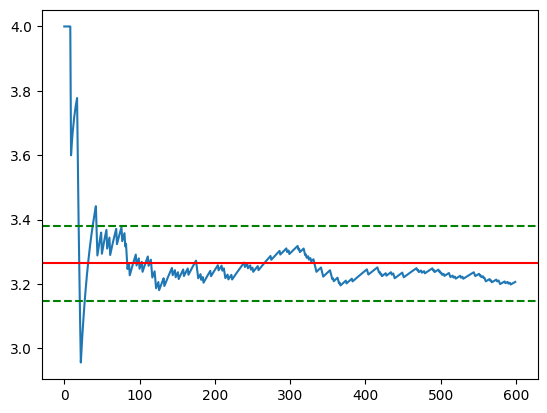

In [ ]:
plt.plot(X)
plt.axhline(y=np.mean(X), color='r', linestyle='-')
plt.axhline(y=(np.mean(X))-(np.std(X)), color='g', linestyle='--')                       # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
plt.axhline(y=(np.mean(X))+(np.std(X)), color='g', linestyle='--')                                  # Sin embargo, diferentes ejecuciones darán resultados distintos

In [ ]:
print(np.mean(X), np.std(X))

3.1817153282974853 0.14238718035217818


# **Aproximación de $\pi$: Analíticamente**#

Consideremos la variable:

$f(x) = \begin{cases}
1 & \text{si el dado cae dentro de p } \\
0 & \text{si ace fuera de (1-p) }
\end{cases}$

$E[X_i]=1-p + 0(1-p)=p$

$V[X_i]=E[x_i^2]-E[x_i]^2$

$=(1^2\cdot p + 0^2(1-p))-p^2$

$=p-p^2=p(1-p)$

Ahora consideramos

$Z = 4 \cdot\frac{x_1+x_2+...+x_N}{N}$

y Calculamos el valor esperado y la varianza

$E[z]=\frac{4}{N}(E[x_1]+...+E[x_N])$

$E[z]=\frac{4}{N}\cdot Np=4p$

$\therefore E[z]=4p$

$V[z]=\frac{16}{N^2}(V[X_1]+...+v[X_N])$

$V[z]=\frac{16}{N^2}\cdot Np(1-p)$

$V[z]=\frac{16p(1-p)}{N}$

Ahora podemos usar la desigualdad de Chebyshev

$P(|Z_N-\pi|\geq \epsilon)\leq \frac{V[z_n]}{\epsilon^2}$

$P(|Z_N-\pi|\geq \epsilon)\leq \frac{16p(1-p)}{N\epsilon^2}$

**Nota:** Epsilon es el error o la desviación estandar

Luego le damos un valor de $\epsilon$ podemos calcular el valor de N